train2023.csv veri temizleme

## 1 Eksik değerlerin ele alınması

In [145]:
# İlgili kütüphaneler import edilir
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [146]:
# Veri setini okumak
df_train = pd.read_csv("train2023.csv",delimiter=",")
df_train.head()

,index,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,135000
1,1,20,RL,112.0,10859,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,145000
2,2,60,RL,NaN,12394,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Family,225000
3,3,50,C (all),60.0,7500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,COD,Abnorml,68400
4,4,60,RL,41.0,12393,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Normal,195000


In [147]:
df_train = df_train.drop(columns="index")

In [148]:
#Toplam satır ve sütun sayısına bakmak
df_train.shape

(1042, 80)

In [149]:
# eksik veri kolonları
df_train.columns[df_train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [150]:
# eksik değerleri ve eksik değer yüzdelerine bakmak 

def eksik_data(df_train,n):
    eksik_değerler = df_train.isnull().sum().sort_values(ascending=False)

    eksik_değer_yüzdesi = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False) * 100

    eksik_data = pd.concat([eksik_değerler,eksik_değer_yüzdesi],axis=1,keys = ["Eksik Değerler","Eksik Değerler Yüzdesi"],sort=False)
    print(eksik_data.head(n))

eksik_data(df_train,20)

              Eksik Değerler  Eksik Değerler Yüzdesi
PoolQC                  1038               99.616123
MiscFeature             1007               96.641075
Alley                    976               93.666027
Fence                    837               80.326296
MasVnrType               643               61.708253
FireplaceQu              490               47.024952
LotFrontage              186               17.850288
GarageYrBlt               58                5.566219
GarageCond                58                5.566219
GarageType                58                5.566219
GarageFinish              58                5.566219
GarageQual                58                5.566219
BsmtExposure              28                2.687140
BsmtFinType2              28                2.687140
BsmtCond                  27                2.591171
BsmtQual                  27                2.591171
BsmtFinType1              27                2.591171
MasVnrArea                 6                0.

<Axes: >

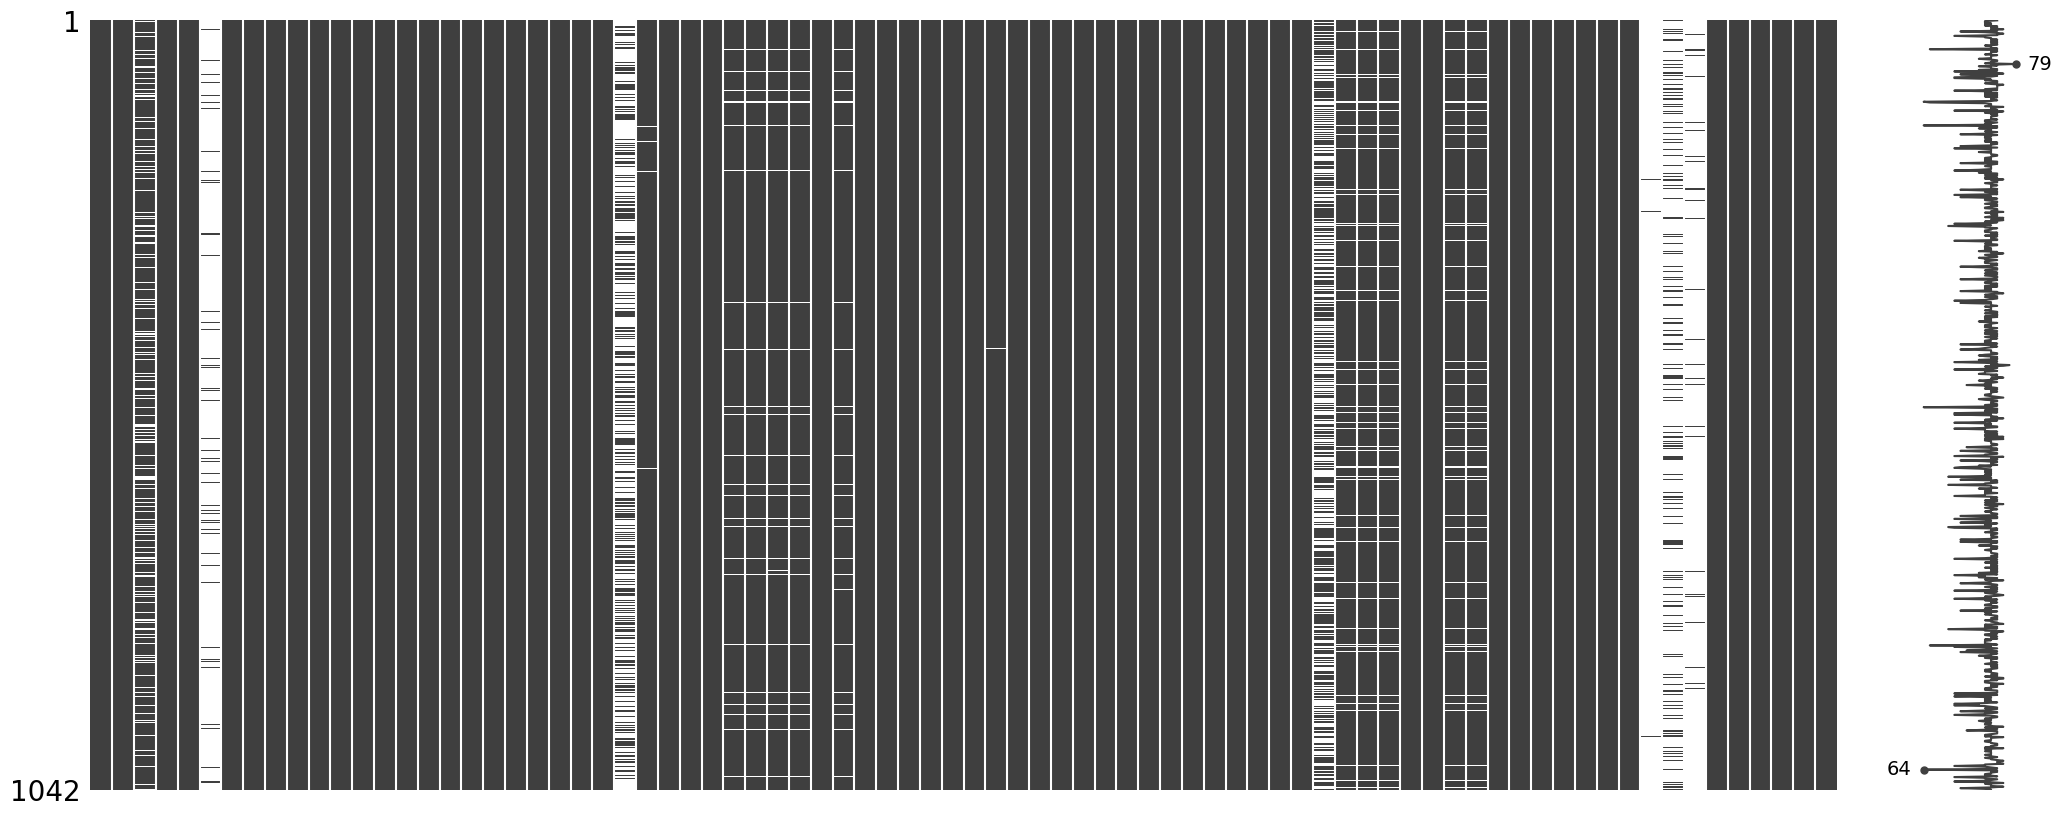

In [151]:
# Veri kümesindeki eksik verilerin görsel temsili
missingno.matrix(df_train)

In [152]:
# Toplam kaç tane eksik değer var
df_train.isnull().sum().sum()

5611

In [153]:
# eksik verilerin tümü için nasıl doldurulacağını seçmek.

def eksik_verileri_doldur(df_train):
    # sıfır ile doldur
    df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)

    # ortalama ile doldur
    #df_train[''] = df_train[''].fillna(df_train[''].mean())

    # medyan ile doldur
    df_train["LotFrontage"] = df_train["LotFrontage"].fillna(df_train["LotFrontage"].median())

    # mod ile doldur
    df_train["Electrical"] = df_train["Electrical"].fillna(df_train["Electrical"].mode()[0])

    return df_train
df_train = eksik_verileri_doldur(df_train)

df_train.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,135000
1,20,RL,112.0,10859,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,145000
2,60,RL,69.0,12394,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,10,2007,WD,Family,225000


In [154]:
garage_features = ["GarageCond", "GarageType", "GarageFinish", "GarageQual"]
for column in garage_features:
    df_train[column] = df_train[column].fillna("NA")
    
df_train["GarageYrBlt"] = df_train["GarageYrBlt"].fillna(0)

In [155]:
basement_features = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for column in basement_features:
    df_train[column] = df_train[column].fillna("NA") 

In [156]:
df_train["Fence"] = df_train["Fence"].fillna("NA")
df_train["FireplaceQu"] = df_train["FireplaceQu"].fillna("NA")
df_train["PoolQC"] = df_train["PoolQC"].fillna("NA")
df_train["MiscFeature"] = df_train["MiscFeature"].fillna("NA")
df_train["Alley"] = df_train["Alley"].fillna("NA")
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("NA")

In [157]:
# Eksik veri kontrolü yapmak
eksik_verilerin_toplamı = df_train.isnull().sum().sum()
print("Eksik verilerin toplamı:",eksik_verilerin_toplamı)

Eksik verilerin toplamı: 0


## 2 Aykırı değerlerin tespiti 

In [158]:

"""
# Bütün kolonların Boxplot grafiğini çizip aykırı değerleri değerlendirmek

# Numeric sütunları seçin
numeric_columns = df_train.select_dtypes(include=['float64', 'int']).columns

# Her bir numeric sütunu için aykırı değerleri belirleyin
for col in numeric_columns:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Sadece aykırı değerlere sahip sütunları çiz
    if any((df_train[col] < lower_limit) | (df_train[col] > upper_limit)):
        sns.boxplot(x=df_train[col])
        plt.title(col)
        plt.tight_layout()
        plt.show()
        """


"\n# Bütün kolonların Boxplot grafiğini çizip aykırı değerleri değerlendirmek\n\n# Numeric sütunları seçin\nnumeric_columns = df_train.select_dtypes(include=['float64', 'int']).columns\n\n# Her bir numeric sütunu için aykırı değerleri belirleyin\nfor col in numeric_columns:\n    Q1 = df_train[col].quantile(0.25)\n    Q3 = df_train[col].quantile(0.75)\n    IQR = Q3 - Q1\n    lower_limit = Q1 - 1.5 * IQR\n    upper_limit = Q3 + 1.5 * IQR\n\n    # Sadece aykırı değerlere sahip sütunları çiz\n    if any((df_train[col] < lower_limit) | (df_train[col] > upper_limit)):\n        sns.boxplot(x=df_train[col])\n        plt.title(col)\n        plt.tight_layout()\n        plt.show()\n        "

In [159]:
# Numerik sutunların tümünde bulunan Aykırı değerleri min-max ile baskılamak

def aykiri_degerleri_min_max_sinirlar_ile_doldur(df_train):
    numerik_sutunlar = df_train.select_dtypes(include=['float64', 'int64']).columns

    for col in numerik_sutunlar:
        Q1 = df_train[col].quantile(0.25)
        Q3 = df_train[col].quantile(0.75)
        IQR = Q3 - Q1

        alt_sinir = Q1 - 1.5 * IQR
        ust_sinir = Q3 + 1.5 * IQR

        # Aykırı değerleri min-max sınırları arasına kırp
        df_train[col] = df_train[col].clip(lower=alt_sinir, upper=ust_sinir)

        #print(f"{col}: Alt Sınır: {alt_sinir}, Üst Sınır: {ust_sinir}\n")
        
    return df_train

# Aykırı değerleri düzelt
df_train = aykiri_degerleri_min_max_sinirlar_ile_doldur(df_train)

df_train.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,50,RL,65.0,7804,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,MnPrv,NA,0,12,2009,WD,Normal,135000.0
1,20,RL,107.5,10859,Pave,NA,Reg,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,6,2009,WD,Normal,145000.0
2,60,RL,69.0,12394,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,10,2007,WD,Family,225000.0


## 3 Kategorik verilerin dönüşümü

In [160]:
def sütunlari_veri_türune_gore_grupla(df_train):
    result_dict = {}

    for col, dtype in df_train.dtypes.items():
        dtype_str = str(dtype)
        
        if dtype_str not in result_dict:
            result_dict[dtype_str] = []
        
        result_dict[dtype_str].append(col)

    result_str = ""
    for dtype, columns in result_dict.items():
        result_str += f"\n{dtype} Veri Türü Sütunları:\n"
        result_str += ', '.join(columns) + '\n'
        result_str += '=' * 50 + '\n'

    return result_str

# df_train DataFrame'iniz olduğunu varsayalım
result = sütunlari_veri_türune_gore_grupla(df_train)

# Sonuçları görüntüleme
print(result)


int64 Veri Türü Sütunları:
MSSubClass, LotArea, OverallQual, YearRemodAdd, BsmtFinSF1, BsmtFinSF2, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, KitchenAbvGr, TotRmsAbvGrd, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold

object Veri Türü Sütunları:
MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition

float64 Veri Türü Sütunları:
LotFrontage, OverallCond, YearBuilt, MasVnrArea, BsmtUnfSF, TotalBsmtSF, BedroomAbvGr, Fireplaces, GarageYrBlt, Garage

In [161]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

kategorik__değişkeler = ['BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'Fence', 'LotShape', 'LandContour', 'Utilities', 'GarageFinish', 'MSSubClass','MSZoning','LotConfig','Neighborhood', 'Condition1', 'Alley',
                  'Condition2', 'GarageType','Functional','SaleCondition','SaleType','Electrical' , 
                  'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd', 'BldgType',
                  'MasVnrType','Foundation','Heating','MiscFeature']
for i in kategorik__değişkeler:
    le.fit(df_train[i])
    df_train[i] = le.transform(df_train[i])
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,4,3,65.0,7804,Pave,1,3,3,0,4,...,0,NA,2,1,0,12,2009,8,4,135000.0
1,0,3,107.5,10859,Pave,1,3,3,0,0,...,0,NA,4,1,0,6,2009,8,4,145000.0
2,5,3,69.0,12394,Pave,1,0,3,0,0,...,0,NA,4,1,0,10,2007,8,3,225000.0
3,4,0,60.0,7500,Pave,1,3,3,0,4,...,0,NA,4,1,0,4,2010,0,0,68400.0
4,5,3,41.0,12393,Pave,1,1,3,0,2,...,0,NA,4,1,0,9,2006,8,4,195000.0


In [162]:
df_train = pd.get_dummies(df_train, drop_first=True,dtype =int, columns=['CentralAir', 'Street', 'PavedDrive', 'LandSlope'])
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,...,YrSold,SaleType,SaleCondition,SalePrice,CentralAir_Y,Street_Pave,PavedDrive_P,PavedDrive_Y,LandSlope_Mod,LandSlope_Sev
0,4,3,65.0,7804,1,3,3,0,4,17,...,2009,8,4,135000.0,1,1,0,1,0,0
1,0,3,107.5,10859,1,3,3,0,0,4,...,2009,8,4,145000.0,1,1,0,1,0,0
2,5,3,69.0,12394,1,0,3,0,0,7,...,2007,8,3,225000.0,1,1,0,1,0,0
3,4,0,60.0,7500,1,3,3,0,4,8,...,2010,0,0,68400.0,1,1,0,1,0,0
4,5,3,41.0,12393,1,1,3,0,2,4,...,2006,8,4,195000.0,1,1,0,1,0,0


In [163]:
for col in ['GarageQual', 'GarageCond', 'ExterQual','ExterCond','HeatingQC','KitchenQual', 'PoolQC', 'BsmtQual','BsmtCond', 'FireplaceQu']:
    df_train[col].replace({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

In [164]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,...,YrSold,SaleType,SaleCondition,SalePrice,CentralAir_Y,Street_Pave,PavedDrive_P,PavedDrive_Y,LandSlope_Mod,LandSlope_Sev
0,4,3,65.0,7804,1,3,3,0,4,17,...,2009,8,4,135000.0,1,1,0,1,0,0
1,0,3,107.5,10859,1,3,3,0,0,4,...,2009,8,4,145000.0,1,1,0,1,0,0
2,5,3,69.0,12394,1,0,3,0,0,7,...,2007,8,3,225000.0,1,1,0,1,0,0
3,4,0,60.0,7500,1,3,3,0,4,8,...,2010,0,0,68400.0,1,1,0,1,0,0
4,5,3,41.0,12393,1,1,3,0,2,4,...,2006,8,4,195000.0,1,1,0,1,0,0


In [165]:
# df DataFrame'iniz olduğunu varsayalım
result = sütunlari_veri_türune_gore_grupla(df_train)

# Sonuçları görüntüleme
print(result)


int64 Veri Türü Sütunları:
MSSubClass, LotArea, OverallQual, YearRemodAdd, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtFinSF1, BsmtFinSF2, HeatingQC, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, FireplaceQu, GarageArea, GarageQual, GarageCond, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, MiscVal, MoSold, YrSold

int32 Veri Türü Sütunları:
MSZoning, Alley, LotShape, LandContour, Utilities, LotConfig, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, Electrical, Functional, GarageType, GarageFinish, Fence, MiscFeature, SaleType, SaleCondition, CentralAir_Y, Street_Pave, PavedDrive_P, PavedDrive_Y, LandSlope_Mod, LandSlope_Sev

float64 Veri Türü Sütunları:
LotFrontage, OverallCond, YearBuilt, MasVnrArea, BsmtUnfSF, TotalBsmtSF, Bedr

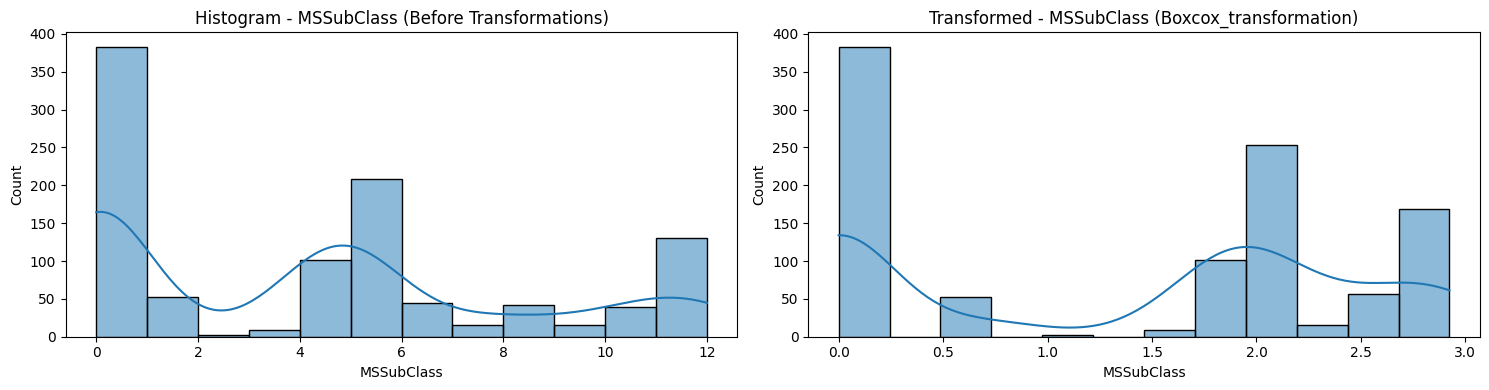

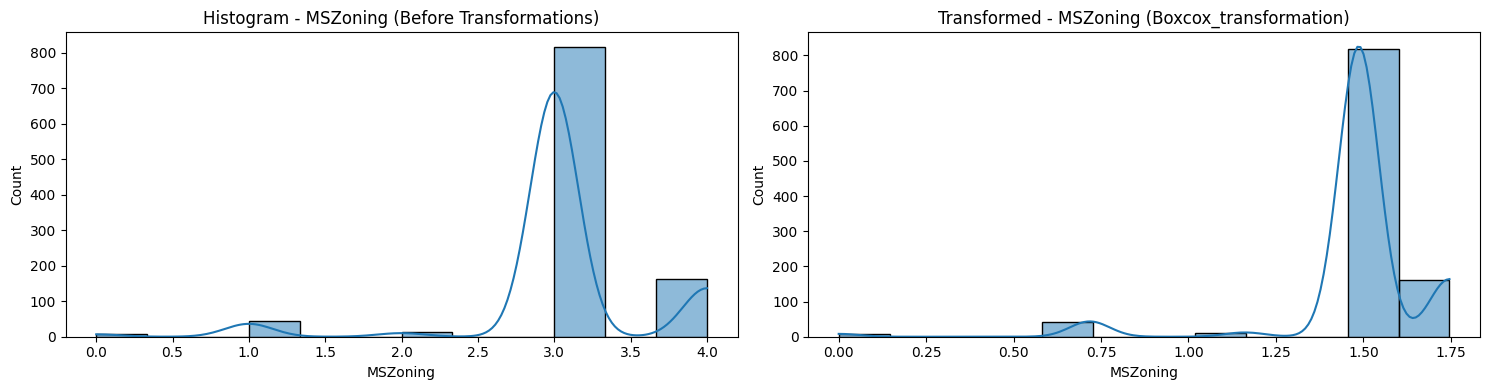

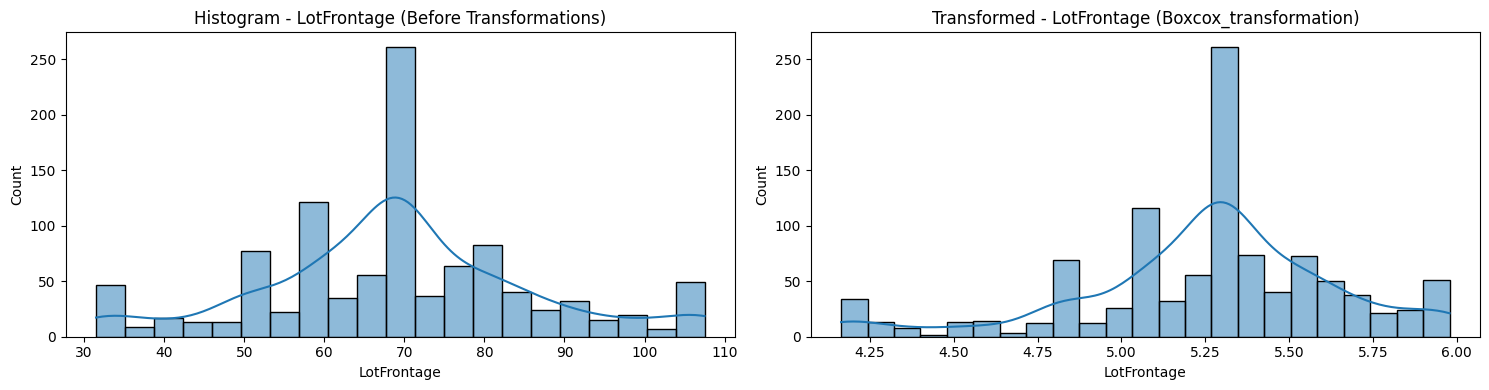

In [168]:
from sklearn.preprocessing import RobustScaler
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

def apply_transformations(df_train, transformation_list):
    transformed_data = df_train.copy()

    for column in df_train.select_dtypes(include=['number']):
        skewness_before = skew(df_train[column])
        kurt_before = kurtosis(df_train[column])

        # Seçilen dönüşümleri uygula
        for transformation in transformation_list:
            if transformation == 'trimming':
                # Aykırı değerleri kırpma (Trimming)
                Q1 = df_train[column].quantile(0.25)
                Q3 = df_train[column].quantile(0.75)
                IQR = Q3 - Q1
                lower_limit = Q1 - 1.5 * IQR
                upper_limit = Q3 + 1.5 * IQR
                transformed_data[column] = df_train[column].clip(lower=lower_limit, upper=upper_limit)

            elif transformation == 'robust_scaling':
                # Robust Standartlaştırma
                scaler = RobustScaler()
                transformed_data[column] = scaler.fit_transform(df_train[[column]])

            elif transformation == 'log_transformation':
                # Log Dönüşümü
                transformed_data[column] = np.log1p(df_train[column])

            elif transformation == 'sqrt_transformation':
                # Kök Dönüşümü
                transformed_data[column] = np.sqrt(df_train[column])

            elif transformation == 'boxcox_transformation':
                # Box-Cox Dönüşümü
                transformed_data[column] = boxcox1p(df_train[column], 0.1)

        skewness_after = skew(transformed_data[column])
        kurt_after = kurtosis(transformed_data[column])

        # Görselleştirme
        if column in df_train.columns[:3]:
            fig, axes = plt.subplots(nrows=1, ncols=len(transformation_list) + 1, figsize=(15, 4))

            sns.histplot(df_train[column], ax=axes[0], kde=True)
            axes[0].set_title(f'Histogram - {column} (Before Transformations)')

            for i, transformation in enumerate(transformation_list):
                sns.histplot(transformed_data[column], ax=axes[i + 1], kde=True)
                axes[i + 1].set_title(f'Transformed - {column} ({transformation.capitalize()})')

            plt.tight_layout()
            plt.show()

    return transformed_data

# Kullanılacak dönüşüm yöntemlerini belirt
transformation_list = ['boxcox_transformation']
# Dönüşümleri uygula
df_transformed = apply_transformations(df_train, transformation_list)

In [169]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,...,YrSold,SaleType,SaleCondition,SalePrice,CentralAir_Y,Street_Pave,PavedDrive_P,PavedDrive_Y,LandSlope_Mod,LandSlope_Sev
0,4,3,65.0,7804,1,3,3,0,4,17,...,2009,8,4,135000.0,1,1,0,1,0,0
1,0,3,107.5,10859,1,3,3,0,0,4,...,2009,8,4,145000.0,1,1,0,1,0,0
2,5,3,69.0,12394,1,0,3,0,0,7,...,2007,8,3,225000.0,1,1,0,1,0,0
3,4,0,60.0,7500,1,3,3,0,4,8,...,2010,0,0,68400.0,1,1,0,1,0,0
4,5,3,41.0,12393,1,1,3,0,2,4,...,2006,8,4,195000.0,1,1,0,1,0,0


In [170]:
# İstediğimiz bir kolonun yerini değiştirip sona almak

yer_değiştir = df_train.pop('SalePrice')
df_train['SalePrice'] = yer_değiştir
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,...,YrSold,SaleType,SaleCondition,CentralAir_Y,Street_Pave,PavedDrive_P,PavedDrive_Y,LandSlope_Mod,LandSlope_Sev,SalePrice
0,4,3,65.0,7804,1,3,3,0,4,17,...,2009,8,4,1,1,0,1,0,0,135000.0
1,0,3,107.5,10859,1,3,3,0,0,4,...,2009,8,4,1,1,0,1,0,0,145000.0
2,5,3,69.0,12394,1,0,3,0,0,7,...,2007,8,3,1,1,0,1,0,0,225000.0
3,4,0,60.0,7500,1,3,3,0,4,8,...,2010,0,0,1,1,0,1,0,0,68400.0
4,5,3,41.0,12393,1,1,3,0,2,4,...,2006,8,4,1,1,0,1,0,0,195000.0


test2023.csv veri temizleme

## 1 Eksik değerlerin ele alınması

In [25]:
# İlgili kütüphaneler import edilir
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [26]:
# Veri setini okumak
df_test = pd.read_csv("test2023.csv",delimiter=",")
df_test.head()

,index,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1042,160,FV,30.0,3182,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1,1043,85,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,1044,20,RL,90.0,11248,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
3,1045,20,RL,71.0,9204,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2008,COD,Normal
4,1046,60,RL,89.0,11645,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal


In [27]:
df_test = df_test.drop(columns="index")

In [28]:
#Toplam satır ve sütun sayısına bakmak
df_test.shape

(418, 79)

In [29]:
# eksik veri kolonları
df_test.columns[df_test.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [30]:
# eksik değerleri ve eksik değer yüzdelerine bakmak 

def eksik_data(df_test,n):
    eksik_değerler = df_test.isnull().sum().sort_values(ascending=False)

    eksik_değer_yüzdesi = (df_test.isnull().sum() / df_test.isnull().count()).sort_values(ascending=False) * 100

    eksik_data = pd.concat([eksik_değerler,eksik_değer_yüzdesi],axis=1,keys = ["Eksik Değerler","Eksik Değerler Yüzdesi"],sort=False)
    print(eksik_data.head(n))

eksik_data(df_test,20)

              Eksik Değerler  Eksik Değerler Yüzdesi
PoolQC                   415               99.282297
MiscFeature              399               95.454545
Alley                    393               94.019139
Fence                    342               81.818182
MasVnrType               229               54.784689
FireplaceQu              200               47.846890
LotFrontage               73               17.464115
GarageCond                23                5.502392
GarageType                23                5.502392
GarageYrBlt               23                5.502392
GarageQual                23                5.502392
GarageFinish              23                5.502392
BsmtFinType2              10                2.392344
BsmtFinType1              10                2.392344
BsmtExposure              10                2.392344
BsmtCond                  10                2.392344
BsmtQual                  10                2.392344
MasVnrArea                 2                0.

<Axes: >

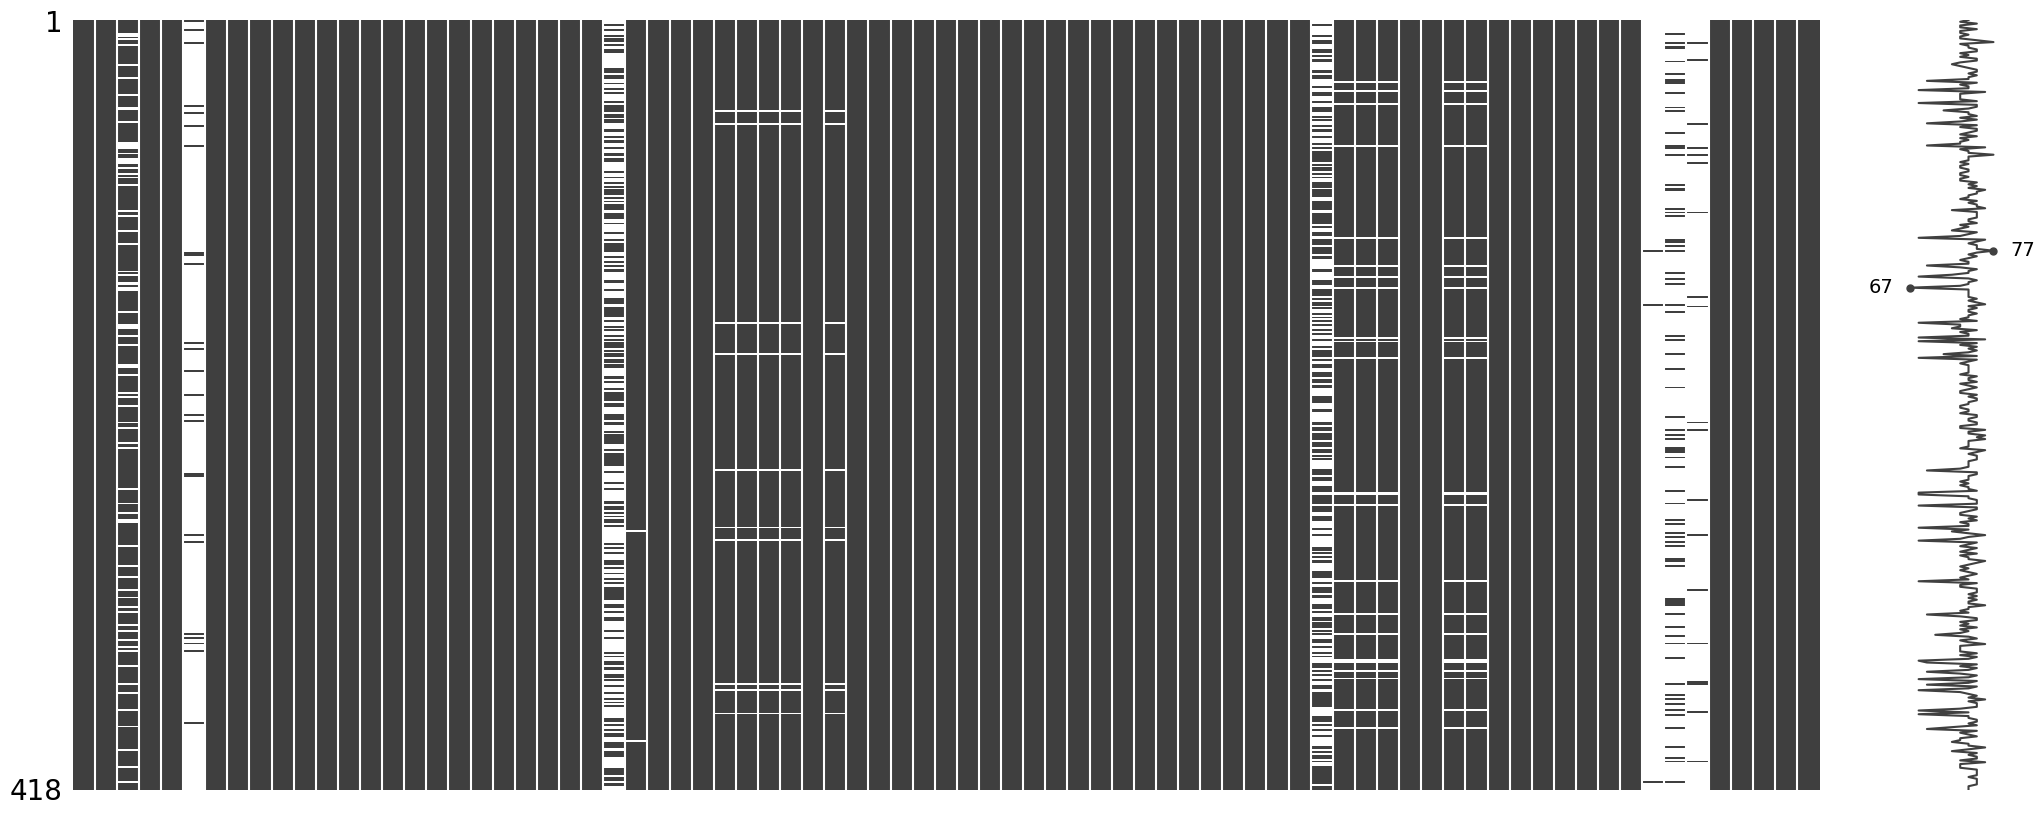

In [31]:
# Veri kümesindeki eksik verilerin görsel temsili
missingno.matrix(df_test)

In [32]:
# Toplam kaç tane eksik değer var
df_test.isnull().sum().sum()

2218

In [33]:
# eksik verilerin tümü için nasıl doldurulacağını seçmek.

def eksik_verileri_doldur(df_test):
    # sıfır ile doldur
    df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)

    # ortalama ile doldur
    #df_test[''] = df_test[''].fillna(df_test[''].mean())

    # medyan ile doldur
    df_test["LotFrontage"] = df_test["LotFrontage"].fillna(df_test["LotFrontage"].median())

    # mod ile doldur
    df_test["Electrical"] = df_test["Electrical"].fillna(df_test["Electrical"].mode()[0])

    return df_test
df_test = eksik_verileri_doldur(df_test)

df_test.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,160,FV,30.0,3182,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1,85,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,20,RL,90.0,11248,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal


In [34]:
garage_features = ["GarageCond", "GarageType", "GarageFinish", "GarageQual"]
for column in garage_features:
    df_test[column] = df_test[column].fillna("NA")
    
df_test["GarageYrBlt"] = df_test["GarageYrBlt"].fillna(0)

In [35]:
basement_features = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for column in basement_features:
    df_test[column] = df_test[column].fillna("NA") 

In [36]:
df_test["Fence"] = df_test["Fence"].fillna("NA")
df_test["FireplaceQu"] = df_test["FireplaceQu"].fillna("NA")
df_test["PoolQC"] = df_test["PoolQC"].fillna("NA")
df_test["MiscFeature"] = df_test["MiscFeature"].fillna("NA")
df_test["Alley"] = df_test["Alley"].fillna("NA")
df_test["MasVnrType"] = df_test["MasVnrType"].fillna("NA")

In [37]:
# Eksik veri kontrolü yapmak
eksik_verilerin_toplamı = df_test.isnull().sum().sum()
print("Eksik verilerin toplamı:",eksik_verilerin_toplamı)

Eksik verilerin toplamı: 0


## 2 Aykırı değerlerin tespiti 

In [38]:
"""
# Bütün kolonların Boxplot grafiğini çizip aykırı değerleri değerlendirmek

# Numeric sütunları seçin
numeric_columns = df_test.select_dtypes(include=['float64', 'int']).columns

# Her bir numeric sütunu için aykırı değerleri belirleyin
for col in numeric_columns:
    Q1 = df_test[col].quantile(0.25)
    Q3 = df_test[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Sadece aykırı değerlere sahip sütunları çiz
    if any((df_test[col] < lower_limit) | (df_test[col] > upper_limit)):
        sns.boxplot(x=df_test[col])
        plt.title(col)
        plt.tight_layout()
        plt.show()
        
"""

"\n# Bütün kolonların Boxplot grafiğini çizip aykırı değerleri değerlendirmek\n\n# Numeric sütunları seçin\nnumeric_columns = df_test.select_dtypes(include=['float64', 'int']).columns\n\n# Her bir numeric sütunu için aykırı değerleri belirleyin\nfor col in numeric_columns:\n    Q1 = df_test[col].quantile(0.25)\n    Q3 = df_test[col].quantile(0.75)\n    IQR = Q3 - Q1\n    lower_limit = Q1 - 1.5 * IQR\n    upper_limit = Q3 + 1.5 * IQR\n\n    # Sadece aykırı değerlere sahip sütunları çiz\n    if any((df_test[col] < lower_limit) | (df_test[col] > upper_limit)):\n        sns.boxplot(x=df_test[col])\n        plt.title(col)\n        plt.tight_layout()\n        plt.show()\n        \n"

In [39]:
# Numerik sutunların tümünde bulunan Aykırı değerleri min-max ile baskılamak

def aykiri_degerleri_min_max_sinirlar_ile_doldur(df_test):
    numerik_sutunlar = df_test.select_dtypes(include=['float64', 'int64']).columns

    for col in numerik_sutunlar:
        Q1 = df_test[col].quantile(0.25)
        Q3 = df_test[col].quantile(0.75)
        IQR = Q3 - Q1

        alt_sinir = Q1 - 1.5 * IQR
        ust_sinir = Q3 + 1.5 * IQR

        # Aykırı değerleri min-max sınırları arasına kırp
        df_test[col] = df_test[col].clip(lower=alt_sinir, upper=ust_sinir)

        #print(f"{col}: Alt Sınır: {alt_sinir}, Üst Sınır: {ust_sinir}\n")
        
    return df_test

# Aykırı değerleri düzelt
df_test = aykiri_degerleri_min_max_sinirlar_ile_doldur(df_test)

df_test.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,145,FV,33.0,3182.0,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,6,2010,WD,Normal
1,85,RL,70.0,8400.0,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,5,2007,WD,Normal
2,20,RL,90.0,11248.0,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,0,NA,NA,NA,0,7,2007,WD,Normal


## 3 Kategorik verilerin dönüşümü

In [40]:
def sütunlari_veri_türune_gore_grupla(df_test):
    result_dict = {}

    for col, dtype in df_test.dtypes.items():
        dtype_str = str(dtype)
        
        if dtype_str not in result_dict:
            result_dict[dtype_str] = []
        
        result_dict[dtype_str].append(col)

    result_str = ""
    for dtype, columns in result_dict.items():
        result_str += f"\n{dtype} Veri Türü Sütunları:\n"
        result_str += ', '.join(columns) + '\n'
        result_str += '=' * 50 + '\n'

    return result_str

# df_test DataFrame'iniz olduğunu varsayalım
result = sütunlari_veri_türune_gore_grupla(df_test)

# Sonuçları görüntüleme
print(result)


int64 Veri Türü Sütunları:
MSSubClass, OverallQual, YearRemodAdd, BsmtFinSF2, LowQualFinSF, BsmtHalfBath, FullBath, HalfBath, KitchenAbvGr, TotRmsAbvGrd, GarageArea, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold

object Veri Türü Sütunları:
MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition

float64 Veri Türü Sütunları:
LotFrontage, LotArea, OverallCond, YearBuilt, MasVnrArea, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, BedroomAbvGr, Fireplaces, GarageYrBlt, GarageCars, WoodDeckSF, OpenPor

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

kategorik__değişkeler = ['BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'Fence', 'LotShape', 'LandContour', 'Utilities', 'GarageFinish', 'MSSubClass','MSZoning','LotConfig','Neighborhood', 'Condition1', 'Alley',
                  'Condition2', 'GarageType','Functional','SaleCondition','SaleType','Electrical' , 
                  'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd', 'BldgType',
                  'MasVnrType','Foundation','Heating','MiscFeature']
for i in kategorik__değişkeler:
    le.fit(df_test[i])
    df_test[i] = le.transform(df_test[i])
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,12,1,33.0,3182.0,Pave,2,3,3,0,4,...,0,0,NA,4,1,0,6,2010,7,4
1,9,3,70.0,8400.0,Pave,1,3,3,0,4,...,0,0,NA,4,1,0,5,2007,7,4
2,0,3,90.0,11248.0,Pave,1,0,3,0,0,...,0,0,NA,4,1,0,7,2007,7,4
3,0,3,71.0,9204.0,Pave,1,3,3,0,4,...,0,0,NA,4,1,0,8,2008,0,4
4,5,3,89.0,11645.0,Pave,1,0,3,0,0,...,0,0,NA,4,1,0,8,2006,7,4


In [42]:
df_test = pd.get_dummies(df_test, drop_first=True, columns=['CentralAir', 'Street', 'PavedDrive', 'LandSlope'])
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,...,MoSold,YrSold,SaleType,SaleCondition,CentralAir_Y,Street_Pave,PavedDrive_P,PavedDrive_Y,LandSlope_Mod,LandSlope_Sev
0,12,1,33.0,3182.0,2,3,3,0,4,21,...,6,2010,7,4,True,True,False,True,False,False
1,9,3,70.0,8400.0,1,3,3,0,4,19,...,5,2007,7,4,True,True,False,True,False,False
2,0,3,90.0,11248.0,1,0,3,0,0,5,...,7,2007,7,4,True,True,False,True,False,False
3,0,3,71.0,9204.0,1,3,3,0,4,12,...,8,2008,0,4,True,True,False,True,False,False
4,5,3,89.0,11645.0,1,0,3,0,0,5,...,8,2006,7,4,True,True,False,True,False,False


In [43]:
for col in ['GarageQual', 'GarageCond', 'ExterQual','ExterCond','HeatingQC','KitchenQual', 'PoolQC', 'BsmtQual','BsmtCond', 'FireplaceQu']:
    df_test[col].replace({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

In [44]:
# bool olan sütunları int a dönüştürdüm

bool_olan_sutunlar = df_test.select_dtypes(include='bool').columns

for col in bool_olan_sutunlar:
    df_test[col] = df_test[col].astype('int8')

In [45]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,...,MoSold,YrSold,SaleType,SaleCondition,CentralAir_Y,Street_Pave,PavedDrive_P,PavedDrive_Y,LandSlope_Mod,LandSlope_Sev
0,12,1,33.0,3182.0,2,3,3,0,4,21,...,6,2010,7,4,1,1,0,1,0,0
1,9,3,70.0,8400.0,1,3,3,0,4,19,...,5,2007,7,4,1,1,0,1,0,0
2,0,3,90.0,11248.0,1,0,3,0,0,5,...,7,2007,7,4,1,1,0,1,0,0
3,0,3,71.0,9204.0,1,3,3,0,4,12,...,8,2008,0,4,1,1,0,1,0,0
4,5,3,89.0,11645.0,1,0,3,0,0,5,...,8,2006,7,4,1,1,0,1,0,0


In [46]:
# df DataFrame'iniz olduğunu varsayalım
result = sütunlari_veri_türune_gore_grupla(df_test)

# Sonuçları görüntüleme
print(result)


int64 Veri Türü Sütunları:
MSSubClass, OverallQual, YearRemodAdd, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtFinSF2, HeatingQC, LowQualFinSF, BsmtHalfBath, FullBath, HalfBath, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, FireplaceQu, GarageArea, GarageQual, GarageCond, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, MiscVal, MoSold, YrSold

int32 Veri Türü Sütunları:
MSZoning, Alley, LotShape, LandContour, Utilities, LotConfig, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, Electrical, Functional, GarageType, GarageFinish, Fence, MiscFeature, SaleType, SaleCondition

float64 Veri Türü Sütunları:
LotFrontage, LotArea, OverallCond, YearBuilt, MasVnrArea, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, BedroomAbvGr, Fireplaces, GarageYrBlt, GarageCars, WoodDeckSF, OpenPorchSF

int8 Veri Türü Sütunları:
CentralAir_Y

In [47]:
# eksik veri kolonları
df_test.columns[df_test.isnull().any()]

Index([], dtype='object')

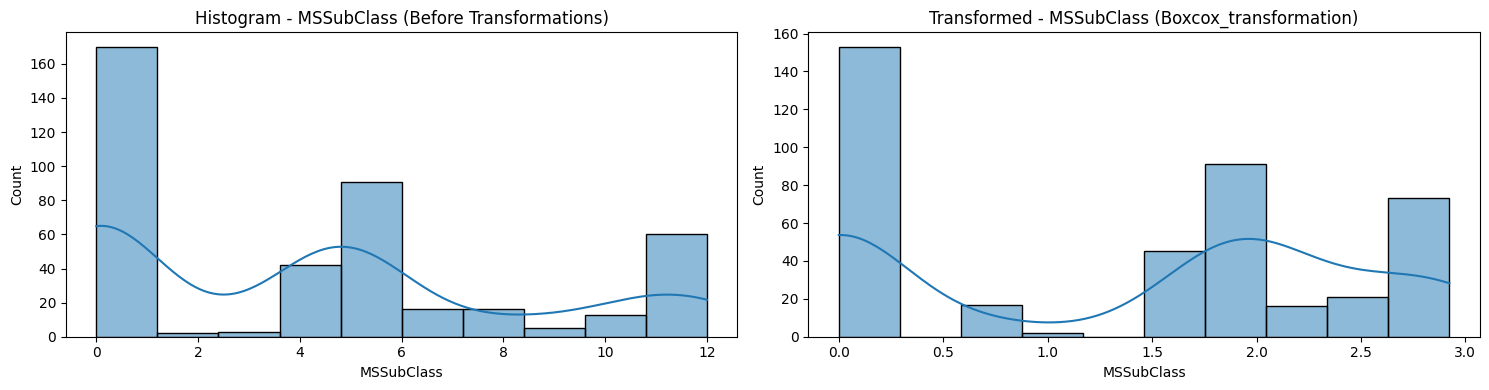

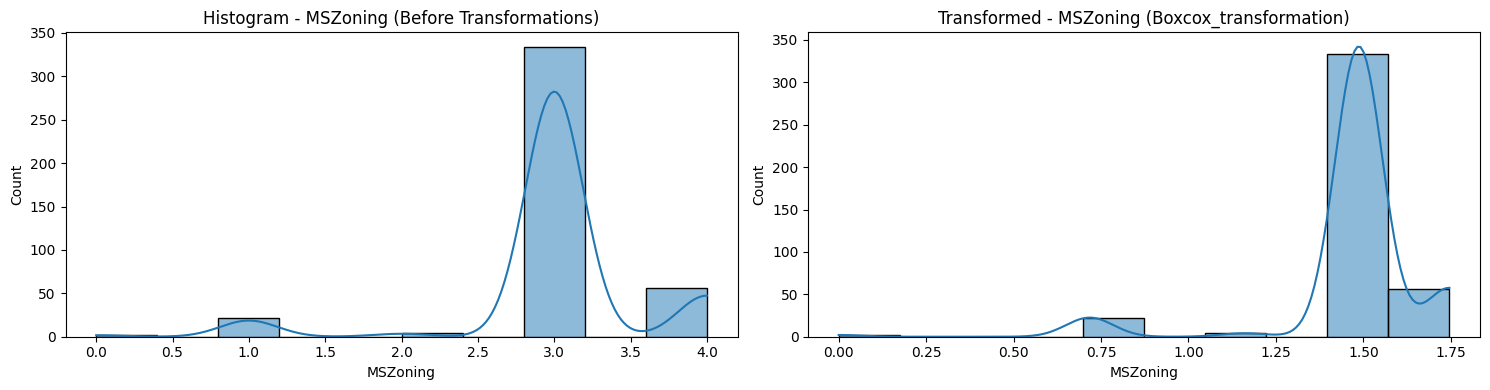

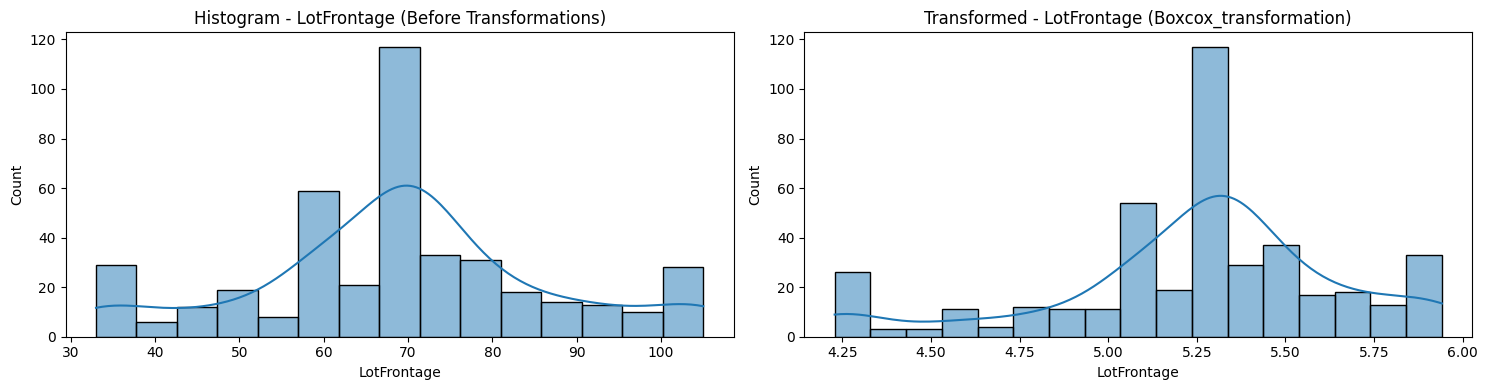

In [48]:
from sklearn.preprocessing import RobustScaler
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

def apply_transformations(df_test, transformation_list):
    transformed_data = df_test.copy()

    for column in df_test.select_dtypes(include=['number']):
        skewness_before = skew(df_test[column])
        kurt_before = kurtosis(df_test[column])

        # Seçilen dönüşümleri uygula
        for transformation in transformation_list:
            if transformation == 'trimming':
                # Aykırı değerleri kırpma (Trimming)
                Q1 = df_test[column].quantile(0.25)
                Q3 = df_test[column].quantile(0.75)
                IQR = Q3 - Q1
                lower_limit = Q1 - 1.5 * IQR
                upper_limit = Q3 + 1.5 * IQR
                transformed_data[column] = df_test[column].clip(lower=lower_limit, upper=upper_limit)

            elif transformation == 'robust_scaling':
                # Robust Standartlaştırma
                scaler = RobustScaler()
                transformed_data[column] = scaler.fit_transform(df_test[[column]])

            elif transformation == 'log_transformation':
                # Log Dönüşümü
                transformed_data[column] = np.log1p(df_test[column])

            elif transformation == 'sqrt_transformation':
                # Kök Dönüşümü
                transformed_data[column] = np.sqrt(df_test[column])

            elif transformation == 'boxcox_transformation':
                # Box-Cox Dönüşümü
                transformed_data[column] = boxcox1p(df_test[column], 0.1)

        skewness_after = skew(transformed_data[column])
        kurt_after = kurtosis(transformed_data[column])

        # Görselleştirme
        if column in df_test.columns[:3]:
            fig, axes = plt.subplots(nrows=1, ncols=len(transformation_list) + 1, figsize=(15, 4))

            sns.histplot(df_test[column], ax=axes[0], kde=True)
            axes[0].set_title(f'Histogram - {column} (Before Transformations)')

            for i, transformation in enumerate(transformation_list):
                sns.histplot(transformed_data[column], ax=axes[i + 1], kde=True)
                axes[i + 1].set_title(f'Transformed - {column} ({transformation.capitalize()})')

            plt.tight_layout()
            plt.show()

    return transformed_data

# Kullanılacak dönüşüm yöntemlerini belirt
transformation_list = ['boxcox_transformation']
# Dönüşümleri uygula
df_transformed = apply_transformations(df_test, transformation_list)

# xgboost Regression

In [49]:
import numpy as np
import pandas as pd

In [50]:
df_train.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,...,YrSold,SaleType,SaleCondition,CentralAir_Y,Street_Pave,PavedDrive_P,PavedDrive_Y,LandSlope_Mod,LandSlope_Sev,SalePrice
0,4,3,65.0,7804,1,3,3,0,4,17,...,2009,8,4,1,1,0,1,0,0,135000.0
1,0,3,107.5,10859,1,3,3,0,0,4,...,2009,8,4,1,1,0,1,0,0,145000.0
2,5,3,69.0,12394,1,0,3,0,0,7,...,2007,8,3,1,1,0,1,0,0,225000.0


In [51]:
x = df_train.iloc[:, :-1].values
y = df_train.iloc[:, -1].values

In [52]:
# Veri setini Eğitim seti ve Test seti olarak ayırma

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [53]:

from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:

"""
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Hiperparametre aralıklarını belirleyin
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [0, 0.1, 1, 2],
    'alpha': [0, 0.1, 1, 2],
    'min_child_weight': [1, 3, 5]
}

# RandomizedSearchCV kullanarak hiperparametre ayarlaması yapın
random_search = RandomizedSearchCV(regressor, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=0)
random_search.fit(x_train, y_train)

# En iyi hiperparametreleri görüntüle
print("En İyi Parametreler:", random_search.best_params_)

# En iyi modeli kullanarak tahmin yapın
y_pred = random_search.best_estimator_.predict(x_test)

# Test seti üzerinde performansı değerlendirin (örnek olarak, RMSE - Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", rmse)

"""

In [55]:
from xgboost import XGBRegressor
regressor = XGBRegressor(subsample=0.8,n_estimators=40,min_child_weight=2,max_depth=3,learning_rate=0.2,reg_lambda=2,gamma=0.2,colsample_bytree=0.9,alpha=1)
regressor.fit(x_train, y_train)

XGBRegressor(alpha=1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=40, n_jobs=None,
             num_parallel_tree=None, ...)

In [56]:
#Test verilerini kullanarak çıktıyı tahmin et
y_pred_train = regressor.predict(x_train)
y_pred = regressor.predict(x_test)

In [57]:
y_pred_df = pd.DataFrame(data=y_pred,columns=["Tahmini_Sonuc"])

In [58]:
y_test_df = pd.DataFrame(data=y_test,columns=["Gerçek_Sonuç"])

karsılastırma_df = pd.concat([y_test_df,y_pred_df],axis=1)
karsılastırma_df

,Gerçek_Sonuç,Tahmini_Sonuc
0,319900.0,289178.156250
1,196000.0,189707.125000
2,170000.0,186209.046875
3,121500.0,161691.906250
4,307000.0,296532.937500
...,...,...
204,89000.0,102848.468750
205,124900.0,165953.484375
206,341537.5,313223.656250
207,90350.0,105422.859375


In [59]:
""" # !!! KONTROL !!! """

from sklearn.metrics import r2_score

x_train = r2_score(y_train, y_pred_train)
x_test = r2_score(y_test,y_pred)

print(f"Eğitim seti tahmin: {x_train}\n\nTest seti tahmin: {x_test}")

Eğitim seti tahmin: 0.9551358674431568

Test seti tahmin: 0.912024456534553


In [61]:
# Ortalama Mutlak Hata (Mean Absolute Error - MAE)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Ortalama Kare Hatası (Mean Squared Error - MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Kök Ortalama Kare Hatası (Root Mean Squared Error - RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 15576.846946022728
Mean Squared Error (MSE): 473437518.58990806
Root Mean Squared Error (RMSE): 21758.619409096435


test verisi üzerinde tahmin işlemleri

In [65]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,...,MoSold,YrSold,SaleType,SaleCondition,CentralAir_Y,Street_Pave,PavedDrive_P,PavedDrive_Y,LandSlope_Mod,LandSlope_Sev
0,12,1,33.0,3182.0,2,3,3,0,4,21,...,6,2010,7,4,1,1,0,1,0,0
1,9,3,70.0,8400.0,1,3,3,0,4,19,...,5,2007,7,4,1,1,0,1,0,0
2,0,3,90.0,11248.0,1,0,3,0,0,5,...,7,2007,7,4,1,1,0,1,0,0
3,0,3,71.0,9204.0,1,3,3,0,4,12,...,8,2008,0,4,1,1,0,1,0,0
4,5,3,89.0,11645.0,1,0,3,0,0,5,...,8,2006,7,4,1,1,0,1,0,0


In [67]:
test = df_test.iloc[:, :].values
test

array([[ 12.,   1.,  33., ...,   1.,   0.,   0.],
       [  9.,   3.,  70., ...,   1.,   0.,   0.],
       [  0.,   3.,  90., ...,   1.,   0.,   0.],
       ...,
       [  0.,   3.,  73., ...,   0.,   0.,   0.],
       [  5.,   3., 105., ...,   1.,   0.,   0.],
       [  0.,   3.,  65., ...,   1.,   0.,   0.]])

In [68]:
y_predd = regressor.predict(test)

In [69]:
y_predd_df = pd.DataFrame(y_predd, columns=["SalePrice"])
y_predd_df.head(10)

,SalePrice
0,158180.139456
1,126297.888500
2,279420.261826
3,133563.519034
4,197841.507410
5,133584.582860
6,133128.425027
7,140712.437987
8,243050.249654
9,137583.387723


In [70]:
all_df =df_test.merge(y_predd_df, how="left", left_index=True, right_index=True)
all_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,...,YrSold,SaleType,SaleCondition,CentralAir_Y,Street_Pave,PavedDrive_P,PavedDrive_Y,LandSlope_Mod,LandSlope_Sev,SalePrice
0,12,1,33.0,3182.00,2,3,3,0,4,21,...,2010,7,4,1,1,0,1,0,0,158180.139456
1,9,3,70.0,8400.00,1,3,3,0,4,19,...,2007,7,4,1,1,0,1,0,0,126297.888500
2,0,3,90.0,11248.00,1,0,3,0,0,5,...,2007,7,4,1,1,0,1,0,0,279420.261826
3,0,3,71.0,9204.00,1,3,3,0,4,12,...,2008,0,4,1,1,0,1,0,0,133563.519034
4,5,3,89.0,11645.00,1,0,3,0,0,5,...,2006,7,4,1,1,0,1,0,0,197841.507410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,8,3,70.0,17328.25,1,0,3,0,1,7,...,2006,7,2,1,1,0,1,0,0,204783.186535
414,5,3,80.0,10240.00,1,3,3,0,4,16,...,2006,7,4,1,1,0,1,0,0,262779.537507
415,0,3,73.0,10921.00,1,3,1,0,4,7,...,2007,7,4,1,1,1,0,0,0,128215.832550
416,5,3,105.0,17328.25,1,2,1,0,1,8,...,2006,5,5,1,1,0,1,0,0,224648.742403
